In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

回归线

In [2]:
#创建一组数据
x = np.arange(0,100,0.1)
#创建一个正态分布的干扰项
noise = np.random.normal(0,1.2,len(x))

y = 5 * x - 4 + noise
#转换为二维数据，以便在sklearn中使用
x = x.reshape(len(x),1)


In [3]:
lr = LinearRegression()
#fit只接受二维数组
lr.fit(x,y)
print(lr.coef_,'\n',lr.intercept_)

[5.00100319] 
 -4.06989450351287


拟合后的回归方程可以对x进行简单的预测

In [4]:
unknown_x = 111
w0 = lr.intercept_
w1 = lr.coef_
y_hat = w0 + w1 * unknown_x
y_hat

array([551.04145984])

In [5]:
#使用模型预测
#根据给定的x数据，返回预测数据，x必须是二维的数据
y_hat = lr.predict([[unknown_x]])
y_hat

array([551.04145984])

#### 可视化

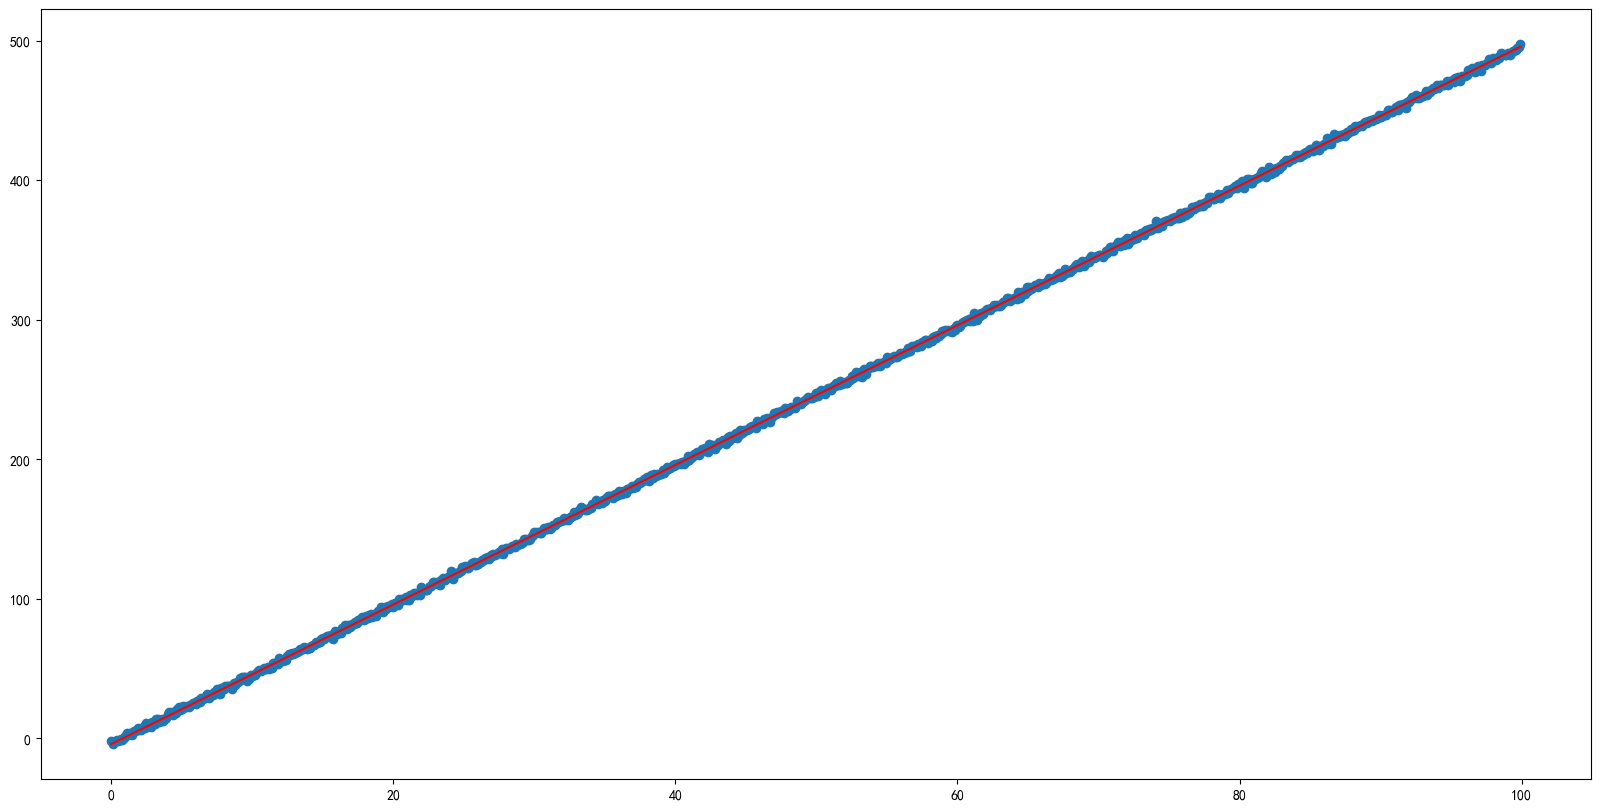

In [6]:
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,10))
plt.scatter(x.flatten(),y)
plt.plot(x,lr.predict(x),'r')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x = np.arange(0,100,0.1)
#shuffle 用来指定是否进行洗牌操作，默认值为True
#random_state 随机种子，用来控制随机行为，随机种子相同，洗牌的时候顺序相同
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train,'\n',X_test)

[ 2.9 53.5 69.5 55.7 83.6 59.6 16.5 91.8 49.5 82.4  6.5 14.1 92.5 82.7
 65.5 33.1 66.4 24.9 90.7 70.8 30.5 73.4 97.5  4.9 89.6  0.2 54.4 35.
 90.4 53.6 34.4 99.4 48.1 57.5  3.3  3.1 23.1 96.3 19.2 33.3  0.3 20.4
 51.4 79.9 30.6 10.9 43.   7.7  8.4 28.6  8.2 99.1 78.9 89.4 39.8 32.3
 51.9 91.6 92.2  0.5 73.1 46.5  9.7 26.6 35.7 86.8 79.8 38.  63.1 38.1
 49.  11.8 90.  25.  52.3  0.9 19.6 60.3  8.1 78.3 58.7 79.7 23.9 29.
 21.1 71.7 35.9 44.9 22.7 95.  94.6 79.6 50.1 46.4 36.2 46.8 93.5 42.8
  0.7 15.5 54.1 44.  48.2 42.2 77.8 94.9 33.4 57.6 93.4 56.7 59.4 53.
 58.1 70.7 44.8 45.3 22.8 35.2 72.8 21.2  7.9 14.8 30.2 62.8 77.7 50.6
 34.2 48.5 71.1 13.3 70.3 31.1 72.2 62.9  0.  31.6 70.6 54.7 87.2 53.2
 47.7 40.4 17.2 12.5 39.4 42.  55.2 90.3  9.  93.9 18.1 27.4 89.5  6.9
 29.1 13.1 30.  42.4 32.6 14.4 42.3 58.  13.5 45.  16.4  2.8 77.3 19.3
 38.8 85.2 16.9 70.5 14.  17.3  0.6 74.5 47.8  7.3 91.  81.3 23.8 14.5
 79.2 23.4 22.  92.3 50.  13.2 99.  77.4 18.5  4.1 69.6 10.8 58.8  5.6
 40.5 44.

In [8]:
y_train

array([ 11.54824452, 260.84143805, 345.4647624 , 273.40852365,
       414.14235541, 291.35528634,  79.64665395, 451.72022797,
       244.06787975, 407.30437165,  28.11166538,  65.1067644 ,
       461.10867923, 407.91383924, 325.16806668, 161.60644344,
       328.50183535, 122.73897457, 448.8681822 , 351.84045354,
       147.28582673, 364.27950942, 483.25990562,  20.6890419 ,
       443.95114827,  -2.508478  , 269.12474088, 170.00088851,
       446.98925532, 264.41592228, 170.77759525, 492.52422701,
       235.9434351 , 284.18394199,  13.88862594,  10.63064431,
       112.23197683, 477.55332132,  92.47844953, 165.6965507 ,
        -1.99570213, 100.21253371, 254.6930864 , 396.95360113,
       149.57314998,  49.9642841 , 210.44191287,  31.80004578,
        37.45751013, 137.3600216 ,  37.84959616, 490.53709756,
       390.19743249, 442.70874045, 195.74831917, 157.20083546,
       254.44780013, 454.21896832, 459.24719839,  -2.02648613,
       361.11447994, 229.91247231,  43.74449505, 129.55

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.array([[1, 2],
              [3, 4]])

poly = PolynomialFeatures(2, include_bias=True)
r = poly.fit_transform(x)
print(f"新的样本\n{r}")
print(f"特征值的指数\n{poly.powers_}")



新的样本
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
特征值的指数
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


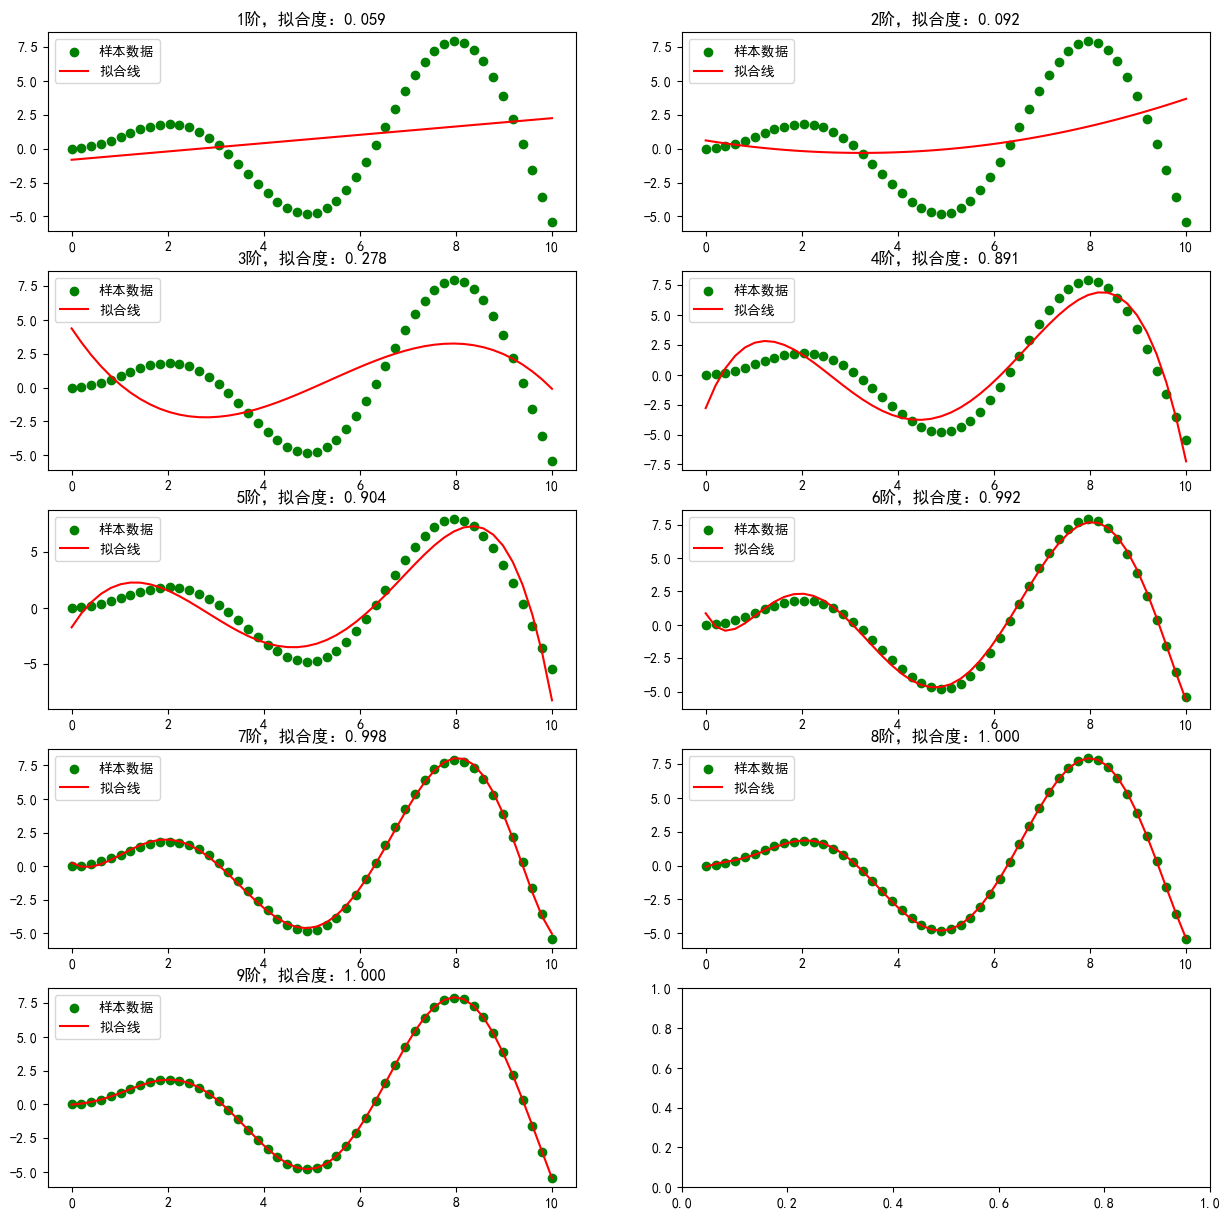

In [10]:
x = np.linspace(0,10,50)
y = x * np.sin(x)
x = x[:, np.newaxis]
figure, ax = plt.subplots(5, 2)
figure.set_size_inches(15, 15)
ax = ax.ravel()

for n in range(1, 10):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    X_transform = poly.fit_transform(x)
    lr = LinearRegression()
    lr.fit(X_transform, y)
    ax[n - 1].set_title(f"{n}阶，拟合度：{lr.score(X_transform, y):.3f}")
    ax[n - 1].scatter(x, y, c="g", label="样本数据")
    ax[n - 1].plot(x, lr.predict(X_transform), "r-", label="拟合线")
    ax[n - 1].legend()


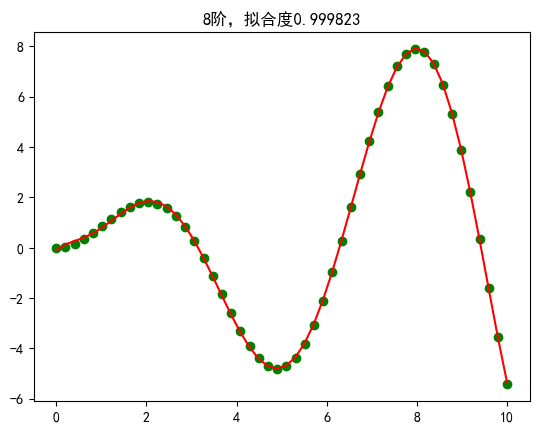

In [11]:
from sklearn.pipeline import Pipeline
x = np.linspace(0,10,50)
y = x * np.sin(x)
X = x[:,np.newaxis]
#定义流水线的步骤，类型为一个列表，列表中每个元素是元组类型
#格式为[(步骤名，评估器)，(步骤名，评估器)]
steps = [("poly",PolynomialFeatures(include_bias=False)),("lr",LinearRegression())]
pipe = Pipeline(steps)
pipe.set_params(poly__degree=8)
pipe.fit(X,y)
score = pipe.score(X,y)
plt.title(f"8阶，拟合度{score:3f}")
plt.scatter(X,y,c="g", label = "样本数据")
plt.plot(X,pipe.predict(X),"r-", label="拟合线")

In [12]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
plt.rcParams["font.family"] = "serif"
x, y, w = make_regression(n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5, noise=0.0)
alphas = np.logspace(-4, 4, 200)
